In [96]:
import pandas as pd
import numpy as np
import seaborn as sns

In [97]:
df = pd.read_csv('./spam.csv', encoding='latin-1')

In [98]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [99]:
df.shape

(5572, 5)

In [100]:
#1 data cleaning
#2 EDA
#3 Text preprocessing
#4 Model Building
#5 Evaluation
#6 Improvement
#7 Website
#8 Deploy

1.DATA CLEANING

In [101]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [102]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [103]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [104]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [105]:
df['target'].value_counts()

target
ham     4825
spam     747
Name: count, dtype: int64

In [106]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [107]:
df['target'] = encode.fit_transform(df['target'])

In [108]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [109]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [110]:
#check for duplicate
df.duplicated().sum()

403

In [111]:
df = df.drop_duplicates(keep='first')

2. EDA

In [112]:
import matplotlib.pyplot as plt

In [113]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x2b9924c1ff0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

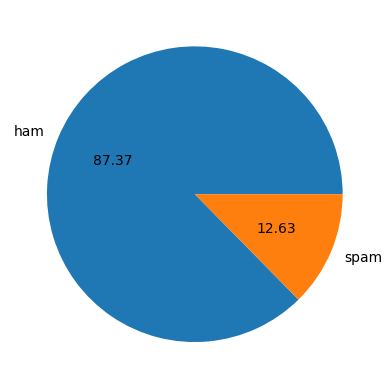

In [114]:
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')

In [115]:
plt.show()

In [116]:
#data is imbalenced

In [117]:
import nltk

In [118]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prudh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [119]:
df['num_characters'] = df['text'].apply(len)

In [120]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [121]:
nltk.download('punkt')
nltk.download('punkt_tab')
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prudh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prudh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [122]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [123]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [124]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [125]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [126]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [127]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


OptionError: No such keys(s): 'mode.use_inf_as_null'

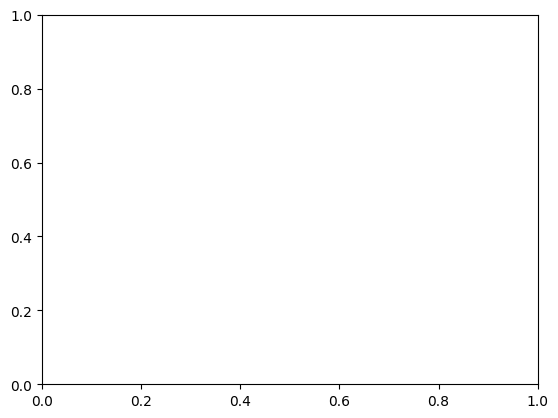

In [128]:
sns.histplot(df[df['target'] == 0]['num_characters'], label='Ham')

OptionError: No such keys(s): 'mode.use_inf_as_null'

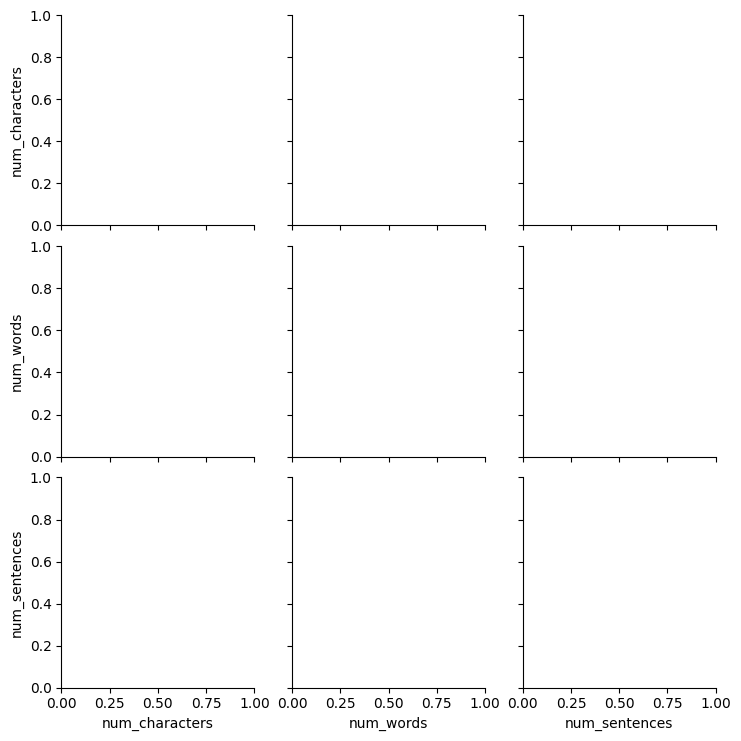

In [75]:
sns.pairplot(df,hue='target')

KeyError: 'spam'

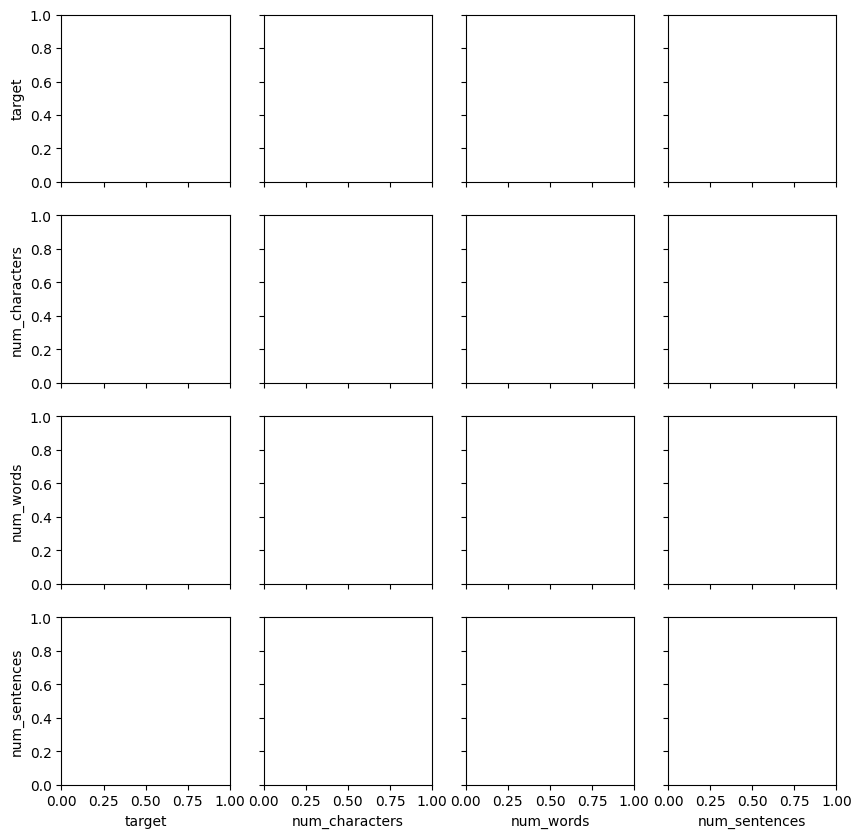

In [77]:
sns.pairplot(data=df, hue='spam')

In [78]:
df.corr()

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prudh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

3. Data Preprocessing


lowercase 

tokenization

removing special characters

removing stopwords and punctuation

stemming


In [5]:
import string
from nltk.stem import PorterStemmer 

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [42]:
df['tranformmed_text']=df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,tranformmed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [51]:
spam_wc = wc.generate(df[df['target']==1]['tranformmed_text'].str.cat(sep=' '))

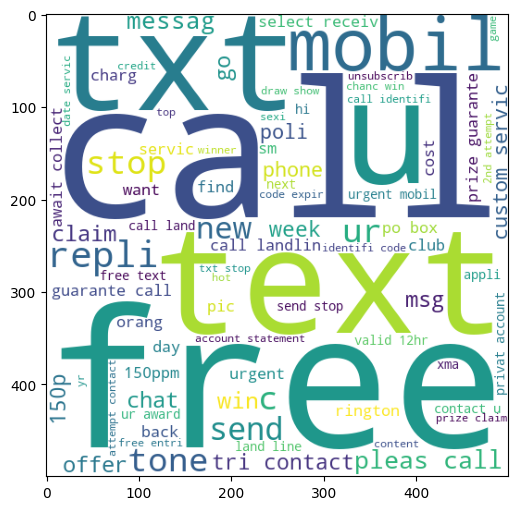

In [52]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [53]:
ham_wc = wc.generate(df[df['target']==0]['tranformmed_text'].str.cat(sep=' '))

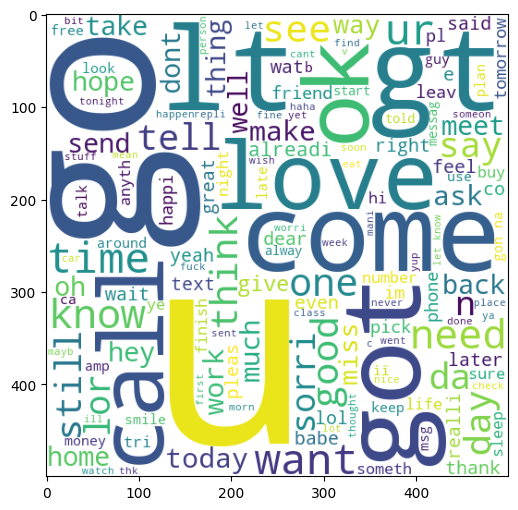

In [56]:
plt.figure(figsize=(10, 6))
plt.imshow(ham_wc)

In [ ]:
spam_corpus = []

for msg in df[df['target'] == 1]['tranformmed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

9939

<Axes: xlabel='Word', ylabel='Count'>

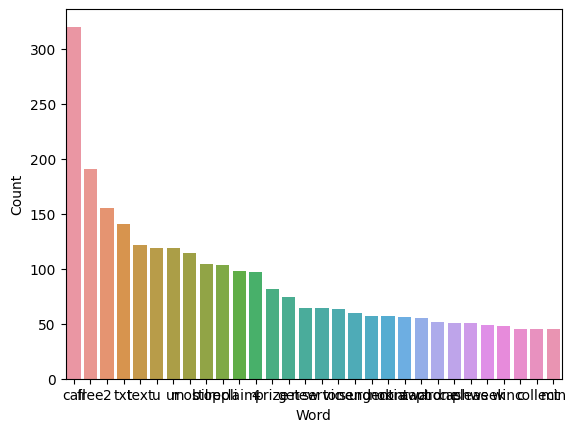

In [62]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])
sns.barplot(x='Word', y='Count', data=most_common_words)

In [63]:
ham_corpus = []
for msg in df[df['target'] == 0]['tranformmed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [65]:
len(ham_corpus)

35404

<Axes: xlabel='Word', ylabel='Count'>

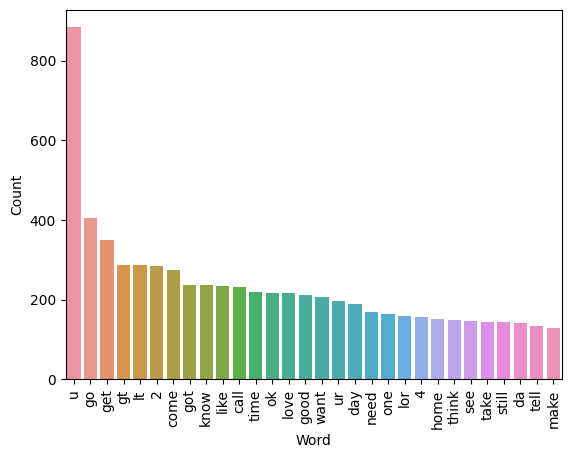

In [68]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Count'])
plt.xticks(rotation='vertical')
sns.barplot(x='Word', y='Count', data=most_common_words)


4. Model Building



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [86]:
X = tfidf.fit_transform(df['tranformmed_text']).toarray()

In [71]:
X.shape

(5169, 6708)

In [87]:
y = df['target'].values

In [88]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [89]:
from sklearn.model_selection import train_test_split 

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [91]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [92]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [93]:
gnb.fit(X_train, y_train)
y_predl = gnb.predict(X_test)
print(accuracy_score(y_test, y_predl))
print(confusion_matrix(y_test, y_predl))
print(precision_score(y_test, y_predl))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [130]:
mnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test)
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, y_predl))
print("Precision:",metrics.precision_score(y_test, y_predl))

Accuracy: 0.9593810444874274
Confusion matrix:
 [[793 103]
 [ 25 113]]
Precision: 0.5231481481481481


In [129]:
bnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test)
print("Accuracy:",
      metrics.accuracy_score(y_test, y_predl))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, y_predl))

Accuracy: 0.8762088974854932
Precision: 1.0
Confusion matrix:
 [[793 103]
 [ 25 113]]


In [ ]:
# tfidf is best,mnb is best

In [131]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))